
<a href="https://colab.research.google.com/github/OsipovOleg/crash-python-notebooks/blob/master/scientific_computing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
from sklearn.model_selection import train_test_split
from numpy.linalg import inv

Для краткого знакомства с numpy:
- [A Quick Introduction to the NumPy Library](https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db)
- [NumPy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [Examples](https://github.com/OsipovOleg/crash-python-notebooks/blob/master/scientific_computing.ipynb)

# 1. Overfitting/Underfitting

Рассмотрим здесь задачу восстановления зависимости $y = 2\sin(x)$ на отрезке $(0,7)$.

В качестве модели будем использовать полиномы.

In [2]:
N = 30
x = np.linspace(0, 7, N)
x[:20]

array([0.   , 0.241, 0.483, 0.724, 0.966, 1.207, 1.448, 1.69 , 1.931,
       2.172, 2.414, 2.655, 2.897, 3.138, 3.379, 3.621, 3.862, 4.103,
       4.345, 4.586])

In [3]:
y_true = 2*np.sin(x)
y_true[:20]

array([ 0.   ,  0.478,  0.928,  1.325,  1.645,  1.869,  1.985,  1.986,
        1.872,  1.649,  1.33 ,  0.935,  0.485,  0.007, -0.471, -0.922,
       -1.319, -1.641, -1.866, -1.984])

In [4]:
x_train, x_test, y_true_train, y_true_test = train_test_split(
x, y_true, test_size=0.2, random_state=42)

y_true_train[:20]

array([ 0.915, -0.941,  0.485,  0.   ,  1.645, -1.319,  1.869,  0.007,
        0.935, -1.653,  0.478,  0.928, -0.492,  1.325, -1.874, -0.015,
       -1.866,  1.314, -1.987,  1.986])

In [5]:
y_true_test[:20]

array([ 0.464, -0.922, -1.336, -1.641,  1.872,  1.649])

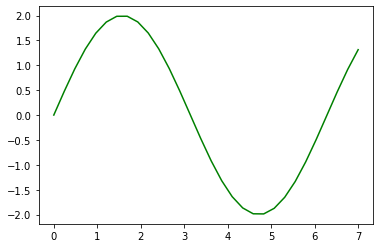

In [6]:
plt.plot(x, y_true, c='green');

In [7]:
y = y_true_train + np.random.normal(0, 1, len(y_true_train))
y[:20]

array([ 0.876, -2.056,  0.552,  0.845,  1.556, -1.109,  2.425, -1.52 ,
        1.245, -0.402, -0.72 ,  2.102, -0.207,  1.503, -0.721, -0.503,
       -3.943,  2.722, -2.104,  1.467])

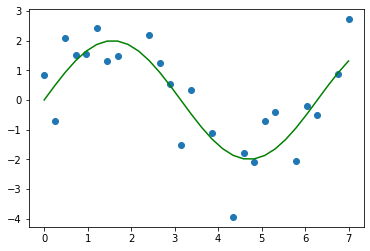

In [8]:
plt.scatter(x_train, y)
plt.plot(x, y_true, c='green');

## Polinomial Regression

In [9]:
d = 0
model = np.poly1d(np.polyfit(x_train, y, d))
x_validation = np.linspace(0, 7, 16)
y_pred = model(x_validation)
print(y_pred)

[0.169 0.169 0.169 0.169 0.169 0.169 0.169 0.169 0.169 0.169 0.169 0.169
 0.169 0.169 0.169 0.169]


1.7868424627492694
1.984293348375478
-----------
2.0745510085208414
1.451382330657801
-----------
2.2337420270534554
1.2030821696550709
-----------
3.009976783542033
0.06930509816705298
-----------
3.023976265785574
0.045198805999774584
-----------
3.051895271486997
0.023992056867149086
-----------


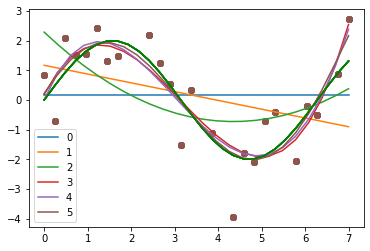

In [10]:
for d in range(6):  
    model = np.poly1d(np.polyfit(x_train, y, d))

    x_validation = np.linspace(0, 7, len(y_true_train))
    y_pred = model(x_validation)

    plt.scatter(x_train, y)
    plt.plot(x_validation, y_pred, label = d);
    plt.plot(x, y_true, c='green'); 

    mse = np.mean((y_true_train - y_pred)**2)
    print(mse)

    y_pred_test = model(x_test)
    mse_test = np.mean((y_true_test - y_pred_test)**2)
    print(mse_test)
    print("-----------")

plt.legend()

In [11]:
#3 чем больше N, тем меньше MSE
#4 модель точнее

In [12]:
#5
baseline = np.mean(y_true_train)
print(baseline)

0.10834309807683241


In [13]:
for d in range(6):  
    model = np.poly1d(np.polyfit(x_train, y, d))

    x_validation = np.linspace(0, 7, len(y_true_train))
    y_pred = model(x_validation)
    
    sumVal1 = 0
    for i in range(len(y_pred)): sumVal1 += (y_pred[i] - y_true[i])**2

    sumVal2 = 0
    for i in range(len(y_true_train)): sumVal2 += (y_true_train[i] - baseline)**2
    R_2 = 1 - sumVal1 / sumVal2
    print(R_2)

-0.19479423518745498
0.416174509446931
-0.16522117298245487
0.0605865233114502
0.038864502053061134
0.027797299712835066


### Задания: 

1. Разбить выборку на train/test в некотором соотношении. 
2. Вычислить для различных значений $d$ (степень полинома) MSE на train/test. Построить кривые MSE для train/test при различных значениях $d$. 
3. Как изменяется качество модели, если в нее добавить больше данных (увеличить $N$)? Привести несколько примеров. 
4. Какие выводы можно сделать из пунктов 2 и 3. Как влияет сложность модели и количество данных на переобучение (overfitting)? 

Еще одной метрикой качества, которую можно использовать в задаче регрессии, является коэффициент детерминации (coefficient of determination), который показывет долю объясненной дисперсии: 

$$
    R^2 = 1 - \frac{\sum_{i=1}^{N}(\hat{y}_i-y_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}
$$

$\bar{y}$ - выборочное среднее (самый простой baseline, который можно взять для нашей задачи - самая простая модель, которую затем можно использовать для сравнения с более сложными моделями).

5. Определить $R^2$ для различных $d$. Сделать выводы. 
6. Ранее было указано, что одним из простых baseline для нашей задачи, *может быть* выборочнее среднее. 
Расмотрим модель, которая для всех объектов возвращает константное значение (полином нулевой степени): 

$$
\hat{y} (\textbf{x}) = w_0
$$

аналитически определить параметры модели ($w_0$), минимизирующие MSE. 

7. Определить аналогично baseline для MAE. 

In [14]:
#6

In [15]:
#7
#  sum i =1 N |y-yi| '       yi - y
# (-----------------)   => ----------
#         N          yi     |yi - y|

# 2. Linear models
## 1. Regression

Объекты: $\textbf{x}_1, \textbf{x}_2, \dots, \textbf{x}_N$

Признаки некоторого объекта: $\textbf{x}=(x_1, \dots, x_D)$

$\mathcal{D} = (\textbf{x}_i, y_i)$, $i=1, \dots, N$ - множество объектов и ответов на них,

$\textbf{X}$ - матрица  объекты-признаки (каждая строка описывает один объект):



$$\textbf{X} = 
\begin{bmatrix}
x_{1,1} & x_{1,2} & \dots & x_{1,D}\\
x_{2,1} & x_{2,2} & \dots & x_{2,D}\\
\dots & \dots & \dots & \dots\\
x_{N,1} & x_{N,2} & \dots & x_{N,D}
\end{bmatrix}
$$


Уравнение регрессии:

$$
\hat{y} (\textbf{x}) = w_0 + w_1x_1 + \dots + w_D x_D
$$

здесь $\hat{y} (\textbf{x})$ -  предсказание на объекте $\textbf{x}$. 

MSE может быть записано в матричной форме:
$$
\frac{1}{N}||\textbf{X}\textbf{w} - \textbf{y}||^{2} \to \min_{\textbf{w}}
$$

Точное решение задачи оптимизации (нормальное уравнение линейной регрессии):

$$
\textbf{w}^* = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^{T} \textbf{y} 
$$

### Задания:
1. Для одномерного случая ($D=1$, $\hat{y} = w_0 + w_1x$) найти вид выражений для $\textbf{w}^* = (w_0^*, w_1^*)$, минимизирующее MSE. 


Далее рассмотрим следующую модельную задачу и данные, на которых нужно будет выполнять задания.  

In [16]:
N = 50
D = 4
# матрица объекты-признаки
X = np.random.uniform(0, 1, (N, D))
X[:10]

array([[0.424, 0.404, 0.385, 0.359],
       [0.283, 0.262, 0.956, 0.106],
       [0.375, 0.109, 0.067, 0.607],
       [0.665, 0.632, 0.892, 0.425],
       [0.323, 0.175, 0.407, 0.588],
       [0.621, 0.953, 0.317, 0.293],
       [0.493, 0.33 , 0.827, 0.557],
       [0.133, 0.941, 0.495, 0.48 ],
       [0.683, 0.801, 0.205, 0.2  ],
       [0.792, 0.756, 0.804, 0.212]])

In [17]:
#  Добавим единичный признак (для w_0)
D += 1
x_ones = np.ones((N, 1))
X = np.hstack((x_ones, X))
X[:10]

array([[1.   , 0.424, 0.404, 0.385, 0.359],
       [1.   , 0.283, 0.262, 0.956, 0.106],
       [1.   , 0.375, 0.109, 0.067, 0.607],
       [1.   , 0.665, 0.632, 0.892, 0.425],
       [1.   , 0.323, 0.175, 0.407, 0.588],
       [1.   , 0.621, 0.953, 0.317, 0.293],
       [1.   , 0.493, 0.33 , 0.827, 0.557],
       [1.   , 0.133, 0.941, 0.495, 0.48 ],
       [1.   , 0.683, 0.801, 0.205, 0.2  ],
       [1.   , 0.792, 0.756, 0.804, 0.212]])

In [18]:
# Вектор весов
w_true = np.random.uniform(low=-5, high=10, size=(D, 1))
w_true

array([[8.041],
       [7.912],
       [1.062],
       [6.495],
       [5.965]])

In [19]:
# Целевая переменная (target)
# y = w0 + w1*x_1 + ... + wD*xD
y = X@w_true
y[:10]

array([[16.47 ],
       [17.402],
       [15.18 ],
       [22.303],
       [16.934],
       [17.77 ],
       [20.987],
       [16.173],
       [16.819],
       [21.591]])

Получили следующие вектора и матрицы:  X, y, w_true. 

### Задания:
2. Используя нормальное уравнение линейной регресси, найти значение $\textbf{w}^*$. 

In [20]:
#W*
x_transpon = X.transpose()
x_transpon[:10]

tempVal = inv(x_transpon.dot(X))
tempVal2 = tempVal.dot(x_transpon)
tempVal2.dot(y)

array([[8.041],
       [7.912],
       [1.062],
       [6.495],
       [5.965]])

## 2.1 Gradient descent

$$
    \textbf{w}^{(k)} = \textbf{w}^{(k-1)} - \alpha_k \nabla Q\left(\textbf{w}^{(k-1)}\right)
$$

### Задания: 

3. Реализовать метод градиентного спуска для одной из указанных функций [Wiki: Тестовые функции для оптимизации](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)

4.  Определить вид градиента в случае MSE. Применить метод градиентного спуска для поиска весов линейной регрессии для представленных выше данных.
Построить график зависимости эмпирического риска $Q(\textbf{w}^{(k)})$ от шага $k$.
Сравнить с точным решением. 

In [21]:
y

array([[16.47 ],
       [17.402],
       [15.18 ],
       [22.303],
       [16.934],
       [17.77 ],
       [20.987],
       [16.173],
       [16.819],
       [21.591],
       [17.468],
       [21.022],
       [21.941],
       [24.605],
       [18.879],
       [19.784],
       [19.413],
       [20.815],
       [13.85 ],
       [25.225],
       [12.979],
       [15.048],
       [13.977],
       [19.728],
       [25.033],
       [17.344],
       [16.926],
       [17.097],
       [17.378],
       [19.531],
       [13.873],
       [18.302],
       [16.613],
       [15.878],
       [19.572],
       [21.033],
       [22.56 ],
       [14.025],
       [13.853],
       [18.816],
       [12.298],
       [24.784],
       [19.684],
       [22.622],
       [10.955],
       [21.674],
       [22.128],
       [15.167],
       [19.807],
       [22.314]])

In [22]:
#3 - 4
l = []

def gradient_descent(
    gradient, start, learn_rate, n_iter = 100, tolerance = 1e-06 ):
    vector = start
    for _ in range(n_iter):
        diff = - learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        # функция которую оценить - MSE, пересчитывать с новыми векторами, собирать в массив, по этому массиву построить график
        temp_mse = np.mean((y - gradient(vector))**2)
        l.append(temp_mse)
        
        # print ('vector = ', vector)
        # print ('gradient = ', gradient(vector))
        # print ('diff =', diff)
        vector += diff
    return vector

#3
# x_opt = gradient_descent(gradient = lambda x: x, start = np.array([1.0, 2.0]), learn_rate = 0.2)

# x_opt[0]**2 + x_opt[1]**2

In [23]:
w_true

array([[8.041],
       [7.912],
       [1.062],
       [6.495],
       [5.965]])

In [24]:
# X

In [25]:
def grad_MSE (w): 
    y_pred = X @ w
    eps = - 2 * (y - y_pred)
    # print(eps.shape)
    grad = eps.transpose() @ X
    return grad.transpose()

grad_MSE(w_true)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [26]:
#4
x_mse_grad = gradient_descent(gradient = grad_MSE, start = w_true * 0, learn_rate = 0.00001, n_iter= 100000)

print (x_mse_grad)

ValueError: operands could not be broadcast together with shapes (50,1) (5,1) 

In [ ]:
l

# 2.2 Stochastic gradient descent  (SGD)

$$
\nabla Q(\textbf{w}) \approx \frac{1}{n}\sum_{k=1}^{n} \nabla l_{i_k}(\textbf{w})
$$

5.  Применить метод стохастического градиентного спуска для поиска весов линейной регрессии (при разных размерах батча) для представленных выше данных.
Построить график зависимости эмпирического риска $Q(w(k))$ от шага $k$. Сравнить скорость сходимости с методом градиентного спуска. 
Сравнить с точным решением. 